<a href="https://colab.research.google.com/github/SnehaS05/proj1-WineQualityTCR-/blob/main/GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT 2**  - ***GOLD PRICE PREDICTION***
### - **Sneha S**



In [40]:
from google.colab import files
uploaded = files.upload()


Saving gld_price_data.csv to gld_price_data.csv


#Importing library

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Loading Dataset

In [44]:

# loading the dataset to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

#Exploring Dataset

In [45]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [46]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [47]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [48]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Data Analysis

In [49]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [50]:
# Number of rows & columns in the dataset
gold_data.shape

(2290, 6)

##Correlation

In [53]:
correlation = gold_data.corr()

##Heatmap

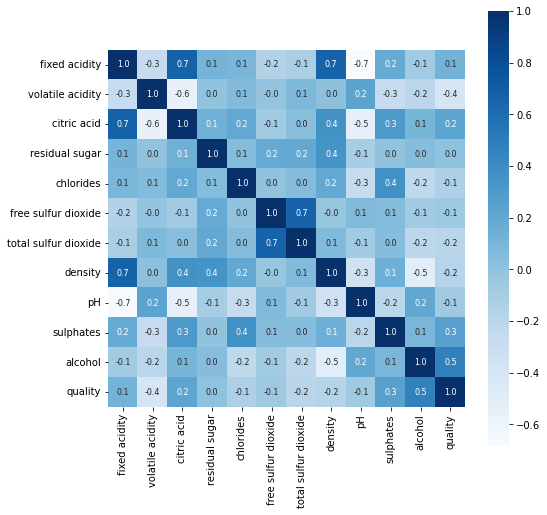

In [52]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

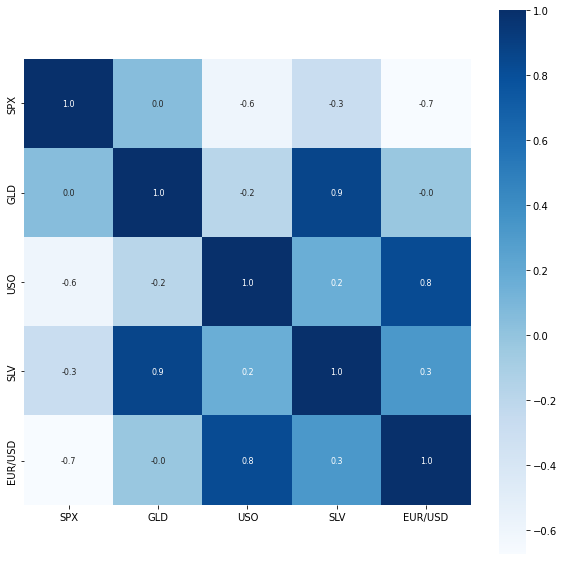

In [54]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [55]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


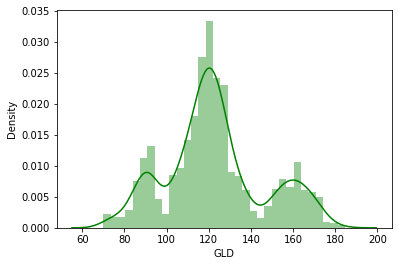

In [56]:
sns.distplot(gold_data['GLD'],color='green')

In [57]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [58]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [60]:
regressor = RandomForestRegressor(n_estimators=100)

In [61]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
test_data_prediction = regressor.predict(X_test)

In [63]:
print(test_data_prediction)

[168.7482994   81.68269996 116.24750016 127.6345006  120.85940119
 154.82759794 150.18739773 126.19760039 117.48909883 126.13930003
 116.756301   172.3562005  141.37489798 168.01099795 115.19410021
 117.40060057 138.4849028  170.40460119 159.71590368 160.68919897
 155.14170052 125.3434002  176.57100001 157.67250351 125.12840039
  93.81099962  77.56709998 120.48070013 119.0592993  167.42519973
  88.06480064 125.13859999  91.02040084 117.69850016 121.087699
 135.74470008 116.01440129 115.17800031 148.10959994 107.11920092
 104.19670263  87.10129792 126.51490077 117.99100032 152.94269899
 119.61469992 108.32360042 108.05119855  93.24780052 127.12599797
  74.5556007  113.67929944 121.16360036 111.18459916 118.9531991
 120.99539923 159.34200067 167.33500136 146.92769666  85.65449849
  94.14710042  86.8533989   90.39060027 119.04810031 126.44450044
 127.62460015 170.24680034 122.2888993  117.29759922  98.49450018
 168.53240191 142.77249809 131.62060241 121.1962021  121.73239932
 119.51230062

In [64]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [65]:
print("R squared error : ", error_score)

R squared error :  0.9895423504077272


In [67]:
Y_test = list(Y_test)

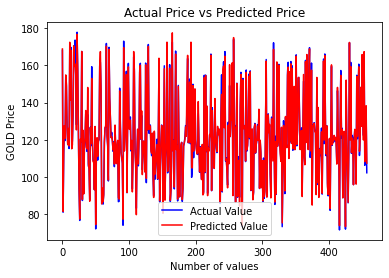

In [70]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()